## Initialization

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import sim_utils as su
MHz = su.MHz

In [17]:
kcq = su.KCQ(nqubits=1)

dt = 0.001 / MHz
t = np.arange(0., 0.5/MHz, dt)

result = qt.mesolve(kcq.H, kcq.thermal_state(), t,
                    c_ops=kcq.loss_terms(),
                    e_ops=[psi * psi.dag() for psi in kcq.cat_states()],
                    options=qt.Options(store_states=False, store_final_state=True))

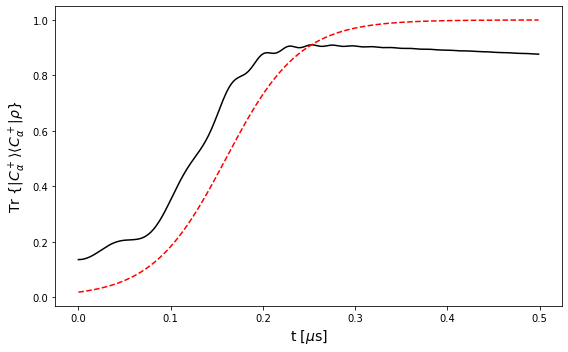

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(t * MHz, result.expect[0], color="black")#, label="$|\pm X \\rangle$")
plt.plot(t * MHz, 0.5 * np.tanh(4. * t * MHz / kcq.tau - 2.) + 0.5, "--", color="red")

plt.xlabel("t [$\mu$s]", fontsize=14)
plt.ylabel("Tr {$|C_\\alpha^+ \\rangle \langle C_\\alpha^+ | \\rho$}", fontsize=14)
plt.tight_layout()
#plt.legend(fontsize=14)
plt.savefig("../paper/figures/initialization.pdf")

## Wigner functions

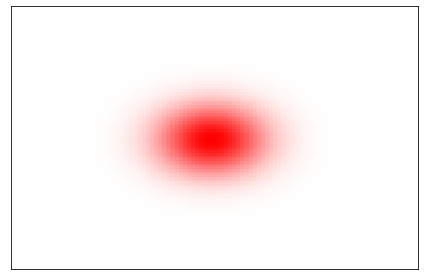

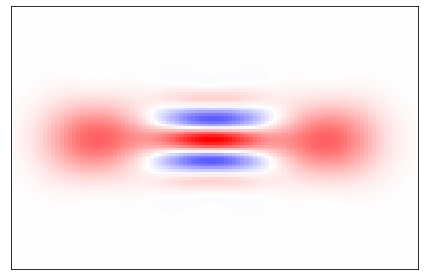

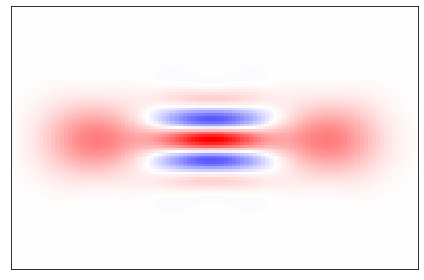

In [19]:
x = np.linspace(-4., 4., 100)

plt.figure()
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])
plt.gca().set_xticks([])
plt.gca().set_yticks([])
w = qt.wigner(kcq.thermal_state(), x[1:], x[1:])
w /= np.max(np.abs(w))
fig = plt.pcolormesh(x, x, w, cmap="bwr", vmin=-1., vmax=1.)
#plt.colorbar(fig)
plt.tight_layout()
plt.savefig("../paper/figures/ground.pdf")

plt.figure()
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])
plt.gca().set_xticks([])
plt.gca().set_yticks([])
w = qt.wigner(result.final_state, x[1:], x[1:])
w /= np.max(np.abs(w))
fig = plt.pcolormesh(x, x, w, cmap="bwr", vmin=-1., vmax=1.)
#plt.colorbar(fig)
plt.tight_layout()
plt.savefig("../paper/figures/initialized_cat.pdf")

plt.figure()
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])
plt.gca().set_xticks([])
plt.gca().set_yticks([])
w = qt.wigner(kcq.cat_states()[0], x[1:], x[1:])
w /= np.max(np.abs(w))
fig = plt.pcolormesh(x, x, w, cmap="bwr", vmin=-1., vmax=1.)
#plt.colorbar(fig)
plt.tight_layout()
plt.savefig("../paper/figures/ideal_cat.pdf")

## Decay

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import sim_utils as su
MHz = su.MHz

In [21]:
kcq = su.KCQ(nqubits=1)

dt = 0.001 / MHz
t = np.arange(0., 20./MHz, dt)

result = qt.mesolve(kcq.H, kcq.thermal_state(), t,
                    c_ops=kcq.loss_terms(),
                    e_ops=[psi * psi.dag() for psi in kcq.cat_states()],
                    options=qt.Options(store_states=False, store_final_state=True))

tau = 2.5255 +/- 0.0023 us


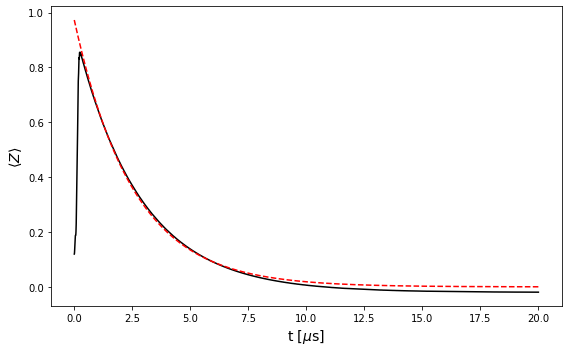

In [22]:
plt.figure(figsize=(8, 5))
z_avg = result.expect[0] - result.expect[1]
plt.plot(t * MHz, z_avg, color="black")

from scipy.optimize import curve_fit

params, cov = curve_fit(lambda x, a, tau: a * np.exp(-x/tau), t[t>0.4], z_avg[t>0.4])

print("tau = {0:.4f} +/- {1:.4f} us".format(params[1], np.sqrt(np.diag(cov))[1]))

plt.plot(t, params[0] * np.exp(-t / params[1]), "--", color="red")

plt.xlabel("t [$\mu$s]", fontsize=14)
plt.ylabel("$\langle Z \\rangle$", fontsize=14)
plt.tight_layout()
plt.savefig("../paper/figures/decay.pdf")

## Rabi oscillations

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import sim_utils as su
MHz = su.MHz

In [24]:
kcq = su.KCQ(nqubits=1)

kcq.add_rabi_oscillation(0)

dt = 0.001 / MHz
t = np.arange(0., 5./MHz, dt)

result = qt.mesolve(kcq.H, kcq.thermal_state(), t,
                    c_ops=kcq.loss_terms(),
                    e_ops=[psi * psi.dag() for psi in kcq.cat_states()],
                    options=qt.Options(store_states=False, store_final_state=True))

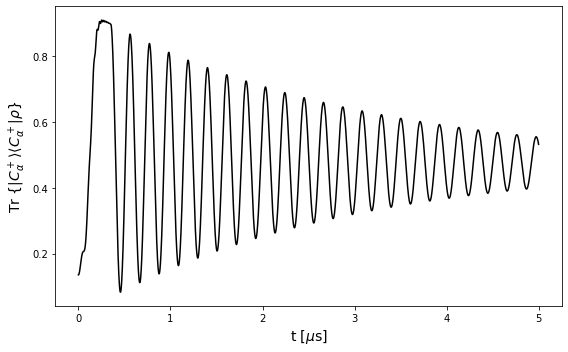

In [25]:
plt.figure(figsize=(8, 5))
plt.plot(t * MHz, result.expect[0], color="black")

plt.xlabel("t [$\mu$s]", fontsize=14)
plt.ylabel("Tr {$|C_\\alpha^+ \\rangle \langle C_\\alpha^+ | \\rho$}", fontsize=14)
plt.tight_layout()
plt.savefig("../paper/figures/rabi.pdf")

## X gate

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import sim_utils as su
MHz = su.MHz

In [41]:
kcq = su.KCQ(nqubits=1)

kcq.add_X_gate(np.pi, 0)
kcq.add_identity_gate(0.1)

dt = 0.001 / MHz
t = np.arange(0., kcq.t0/MHz, dt)

result = qt.mesolve(kcq.H, kcq.thermal_state(), t,
                    c_ops=kcq.loss_terms(),
                    e_ops=[psi * psi.dag() for psi in kcq.cat_states()],
                    options=qt.Options(store_states=False, store_final_state=True))

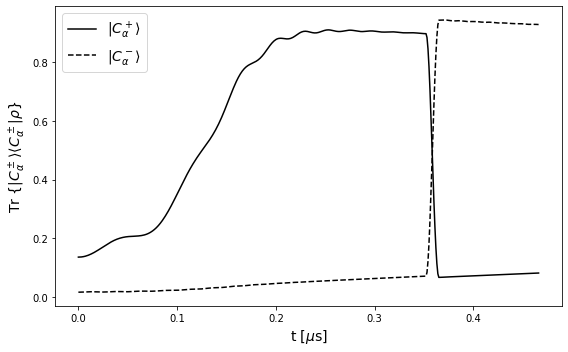

In [42]:
plt.figure(figsize=(8, 5))
plt.plot(t * MHz, result.expect[0], color="black", label="$|C_\\alpha^+ \\rangle$")
plt.plot(t * MHz, result.expect[1], "--", color="black", label="$|C_\\alpha^- \\rangle$")

plt.xlabel("t [$\mu$s]", fontsize=14)
plt.ylabel("Tr {$|C_\\alpha^\pm \\rangle \langle C_\\alpha^\pm | \\rho$}", fontsize=14)
plt.tight_layout()
plt.legend(fontsize=14)
plt.savefig("../paper/figures/x_gate.pdf")

## Bloch sphere

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import sim_utils as su
MHz = su.MHz

In [43]:
kcq = su.KCQ(nqubits=1)

kcq.add_X_gate(np.pi/2, 0)
kcq.add_identity_gate(0.05/MHz)
kcq.add_Z_gate(0)
kcq.add_identity_gate(0.1/MHz)

dt = 0.001 / MHz
t = np.arange(0., kcq.t0/MHz, dt)

result = qt.mesolve(kcq.H, kcq.thermal_state(), t,
                    c_ops=kcq.loss_terms(),
                    e_ops=[psi * psi.dag() for psi in kcq.bloch_states()],
                    options=qt.Options(store_states=False, store_final_state=True))

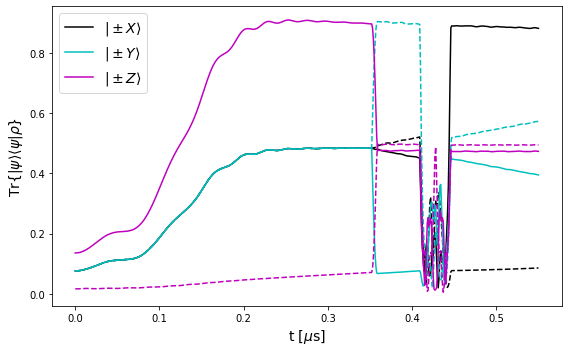

In [48]:
plt.figure(figsize=(8, 5))
plt.plot(t * MHz, result.expect[0], color="black", label="$|\pm X \\rangle$")
plt.plot(t * MHz, result.expect[1], "--", color="black")
plt.plot(t * MHz, result.expect[2], color="c", label="$|\pm Y \\rangle$")
plt.plot(t * MHz, result.expect[3], "--", color="c")
plt.plot(t * MHz, result.expect[4], color="m", label="$|\pm Z \\rangle$")
plt.plot(t * MHz, result.expect[5], "--", color="m")

plt.xlabel("t [$\mu$s]", fontsize=14)
plt.ylabel("Tr{$|\psi \\rangle \langle \psi | \\rho$}", fontsize=14)
#plt.ylabel("Projection", fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig("../paper/figures/bloch.pdf")

## Bell states

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import sim_utils as su
MHz = su.MHz

In [2]:
kcq = su.KCQ(nqubits=2)

kcq.add_entangling_gate()
kcq.add_Z_gate(0)
kcq.add_identity_gate(0.1/MHz)

dt = 0.001 / MHz
t = np.arange(0., kcq.t0, dt)

result = qt.mesolve(kcq.H, kcq.thermal_state(), t,
                    c_ops=kcq.loss_terms(),
                    e_ops=[psi * psi.dag() for psi in kcq.basis_states() + kcq.bell_states()],
                    options=qt.Options(store_states=False, store_final_state=True))

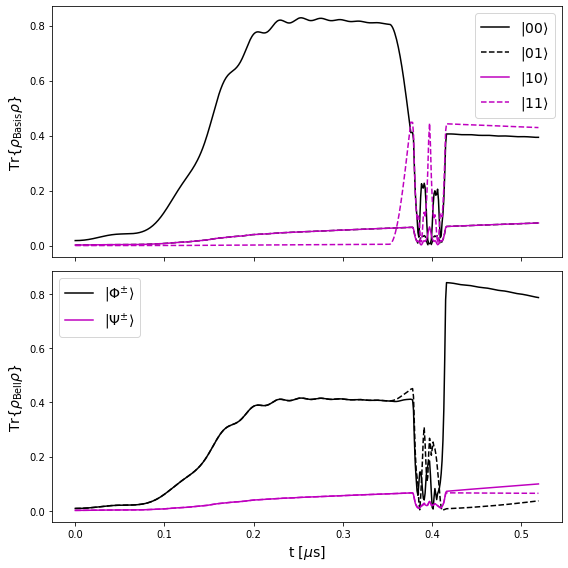

In [3]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8, 8))
ax1.plot(t * MHz, result.expect[0], color="black", label="$|00 \\rangle$")
ax1.plot(t * MHz, result.expect[1], "--", color="black", label="$|01 \\rangle$")
ax1.plot(t * MHz, result.expect[2], color="m", label="$|10 \\rangle$")
ax1.plot(t * MHz, result.expect[3], "--", color="m", label="$|11 \\rangle$")
ax2.plot(t * MHz, result.expect[4], color="black", label="$|\Phi^{\pm} \\rangle$")
ax2.plot(t * MHz, result.expect[5], "--", color="black")
ax2.plot(t * MHz, result.expect[6], color="m", label="$|\Psi^{\pm} \\rangle$")
ax2.plot(t * MHz, result.expect[7], "--", color="m")
ax2.set_xlabel("t [$\mu$s]", fontsize=14)
ax1.set_ylabel("Tr{$\\rho_{\\rm Basis} \\rho$}", fontsize=14)
ax2.set_ylabel("Tr{$\\rho_{\\rm Bell} \\rho$}", fontsize=14)
ax1.legend(fontsize=14)
ax2.legend(fontsize=14)
plt.tight_layout()
plt.savefig("../paper/figures/bell.pdf")

In [5]:
def Q(rho, n_pts, N):
    alpha = np.linspace(-4., 4., n_pts)
    a1, a2 = np.meshgrid(alpha, alpha)
    a1, a2 = a1.flatten(), a2.flatten()
    q = np.empty(a1.size)
    for i, (_a1, _a2) in enumerate(zip(a1, a2)):
        psi = qt.tensor(qt.coherent(N, _a1), qt.coherent(N, _a2))
        q[i] = ((psi * psi.dag() * rho).tr() / np.pi**2).real
    return alpha, q.reshape((n_pts, n_pts))

N = 25
kcq.set_N(25)
rho_mixed = 0.5 * kcq.basis_states()[0] * kcq.basis_states()[0].dag() + 0.5 * kcq.basis_states()[-1] * kcq.basis_states()[-1].dag()
rho_entangled = kcq.bell_states()[0] * kcq.bell_states()[0].dag()
rho_actual = result.final_state
kcq.set_N(10)

alpha, q_mixed = Q(rho_mixed, 50, N)
alpha, q_entangled = Q(rho_entangled, 50, N)
alpha, q_actual = Q(rho_actual, 50, kcq.N)

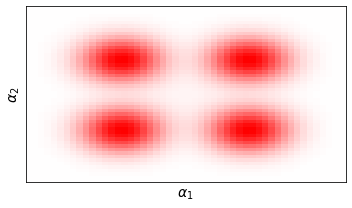

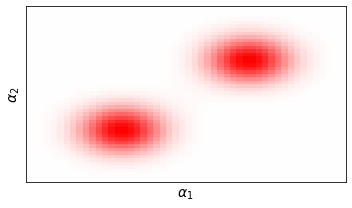

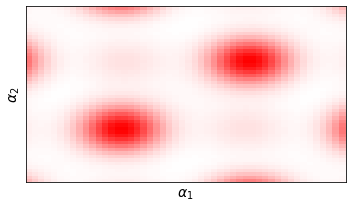

In [14]:
q_mixed /= np.max(q_mixed)
q_entangled /= np.max(q_entangled)
q_actual /= np.max(q_actual)

plt.figure(figsize=(5, 3))
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.xlabel("$\\alpha_1$", fontsize=14)
plt.ylabel("$\\alpha_2$", fontsize=14)
plt.pcolormesh(alpha, alpha, q_mixed, shading="auto", cmap="bwr", vmin=-1., vmax=1.)
plt.tight_layout()
plt.savefig("../paper/figures/q_mixed.pdf")

plt.figure(figsize=(5, 3))
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.xlabel("$\\alpha_1$", fontsize=14)
plt.ylabel("$\\alpha_2$", fontsize=14)
plt.pcolormesh(alpha, alpha, q_entangled, shading="auto", cmap="bwr", vmin=-1., vmax=1.)
plt.tight_layout()
plt.savefig("../paper/figures/q_entangled.pdf")

plt.figure(figsize=(5, 3))
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.xlabel("$\\alpha_1$", fontsize=14)
plt.ylabel("$\\alpha_2$", fontsize=14)
plt.pcolormesh(alpha, alpha, q_actual, shading="auto", cmap="bwr", vmin=-1., vmax=1.)
plt.tight_layout()
plt.savefig("../paper/figures/q_actual.pdf")